# Social Computing/Social Gaming - Summer 2020
# Exercise Sheet 1 - Introduction to Python
We will be using Python for all exercises. In this exercise you will create a basic Python program. 

## Task 1.1: Python Pyramid
**a)** Create a function which takes a number of levels (N) and prints a pyramid that looks like this for N = 4:

In [1]:
   # 
  ###
 #####
#######

**Hints:**
- Do not forget the spaces left and right of the pyramid, except on the ground floor. In the example above 3 spaces to the left and right at the peak.  
- In order to execute a code cell, press Shift + Enter.

In [2]:
def printPyramid(N):
    max_width = 2*N - 1
    for n in range(1, N+1):
        num_spaces = N - n
        num_signs = max_width - 2*num_spaces
        layer = f'{num_spaces*" "}{num_signs*"#"}{num_spaces*" "}'
        print(layer)
         
printPyramid(4)

   #   
  ###  
 ##### 
#######


**b)** Extend the program by implementing user input. The user is asked to enter a number for the levels of the pyramid. Afterwards the pyramid is printed.

In [3]:
# TODO
num_levels = 0
while True:
    num_levels = int(input('Please enter the number of levels: '))
    if num_levels >= 0:
        break
    else:
        print('Number of levels is less than 0! ', end='')
        
printPyramid(num_levels)

Please enter the number of levels: 12
           #           
          ###          
         #####         
        #######        
       #########       
      ###########      
     #############     
    ###############    
   #################   
  ###################  
 ##################### 
#######################


## Task 1.2: The Simposons are introducing Social Computing
In social computing research, we need powerful tools to create, manipulate and display graphs. Luckily, there is a plethora of tools and libaries for that. 
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Especially for the second exercise sheet, we are going to use [**NetworkX**](https://networkx.github.io). It provides rich graph data structures and many out-of-the-box functions to process graphs and calculate different metrics. The tasks below should make you familiar with the library.<br>
Please consult the [reference](https://networkx.github.io/documentation/stable/reference/index.html) and the [tutorial](https://networkx.github.io/documentation/stable/tutorial.html).

To give you a short background on graph visualization, it is the research area in mathematics/computer science concerned with drawing graphs. It has applications in many fields, one of them is social computing. The quality of graph visualization is measured based on certain criteria, for example crossing minimization and bend minimization. There are many graph drawing algorithms that vary in their quality according to the graph's application and size. One technique is to draw graphs by using physical analogies.<br>
The basic idea of this technique is to associate edges between graph nodes with physical forces acting upon the nodes and computing an energy minimum. By setting off the dynamics that is induced by the forces, the graph will finally settle into a natural optimal display. A famous algorithm that implements this technique is the **Fruchtermann-Rheingold** algorithm. Its basic idea is to replace the graph edges with mechanical springs, and let the springs move the system to a minimal energy state.


Furthermore, you will be working with a large datasets, you need to save the variables in a suitable data format. In our case, the pandas library is a good choice. 
A pandas DataFrame is a 2D tabular structure, not unlike a SQL table.
Pandas DataFrame consists of rows, columns and data.
For more information on the library, see the [pandas manual](https://pandas.pydata.org/pandas-docs/version/0.19.2) and its [tutorial](https://pandas.pydata.org/pandas-docs/version/0.19.2/10min.html) to pandas dataframes.

In this exercise you will analyze a dataset about "The Simpsons".

First import the datasets consisting ``nodes.csv``, ``edges.csv`` and ``ep-char.csv``.

- **nodes.csv**: each vertex represents a character
- **edges.csv**: edges between the source character and target character. Represents an undirected graph showing the characters which appeared together in an episode
- **ep-char.csv**: shows which character has appeared in which episode


**Hints**: 
- For most TODOs it is sufficient to look at the pandas manual and use pandas library functions  
- You can get a better overview of the dataframe by printing it


Import the necessary libraries for this exercise.


In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Read the csv files into pandas dataframes.

In [5]:
# read the csv into pandas DataFrames
df_edges = pd.read_csv("simpsons/edges.csv")
df_nodes = pd.read_csv("simpsons/nodes.csv")
df_epchar = pd.read_csv("simpsons/ep-char.csv")

# 203 is the number of the last episode in season 9.
HIGHEST_EPISODE = 203

**a)** Your first task is to drop unwanted rows in the episodes dataframe. We are only interested in Seasons 1-9. 
Unwanted rows are rows which have an ``episode_id`` higher than ``HIGHEST_EPISODE``. 

In [6]:
# TODO: drop rows of the df_epchar DataFrame.
indexNames = df_epchar[df_epchar.episode_id > HIGHEST_EPISODE].index

# Delete these row indices from the dataframe
df_epchar.drop(indexNames, inplace=True)

**b)** Now you can merge the DataFrames together to link the required information. This is not unlike the join operation in SQL.

Since we are only interested in characters from the first 9 seasons, create a DataFrame ``df_merged`` which only contains characters from the first 203 episodes.

In [7]:
# TODO:
df_merged = df_epchar.merge(df_nodes, how='inner', left_on='character_id', right_on='Id')

# df_merged now consists of the characters which appear only in the first 9 seasons
df_merged.drop(['episode_id', 'character_id'], axis=1, inplace=True)

# TODO: now we have unnecessary information, drop the duplicates
df_merged.drop_duplicates(inplace=True)

**c)** Now use the DataFrame of limited characters and merge them with the edges

In [8]:
# TODO:
# Hint: Use a left join, left_on='Id', right_on='Source'
df_merged2 = df_merged.merge(df_edges, how='left', left_on='Id', right_on='Source')

# Drop Type, as it is not that interesting
df_merged2 = df_merged2.drop(['Type'], axis=1)
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
4,1,'Homer Simpson',1,6,2
...,...,...,...,...,...
9802,245,'Brad',245,1,1
9803,245,'Brad',245,2,1
9804,245,'Brad',245,3,1
9805,245,'Brad',245,92,1


**d)** Now we are only interested in characters who have appeared at least 20 times together. Select those.

In [9]:
# TODO: drop rows of the df_episodes DataFrame.
indexNames = df_merged2[df_merged2.Weight < 20].index

# Delete these row indices from the dataframe
df_merged2.drop(indexNames, inplace=True)
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
6,1,'Homer Simpson',1,8,29
...,...,...,...,...,...
8329,138,'Ralph Wiggum',138,4,31
8480,58,'Superintendent Gary Chalmers',58,1,20
8482,58,'Superintendent Gary Chalmers',58,3,22
8483,58,'Superintendent Gary Chalmers',58,4,22


**e)** Now you have to include your alter ego into the network. Create a pandas Series with your name, your Id (which is 1337) and weights. Connect yourself to Homer Simpson. 

In [10]:
# TODO:
# Create a series for your character who is connected to homer 234 times 
# and add it to the dataframe
cols = df_merged2.columns
me_2_homer = pd.Series({cols[0]: 1337, cols[1]: 'Tuan Anh Ma', cols[2]: 1337, cols[3]: 1, cols[4]: 234})
# homer_2_me = pd.Series({cols[0]: 1, cols[1]: 'Homer Simpson', cols[2]: 1, cols[3]: 1337, cols[4]: 234})

# TODO: append the list of series to the pandas data frame
df_merged2 = df_merged2.append([me_2_homer], ignore_index=True)
df_merged2.sort_values(by='Id', inplace=True)

# Create the graph from the dataframe
graph = nx.from_pandas_edgelist(df_merged2, source="Id", target="Target", edge_attr=True)

**f)** Draw the resulting graph with the given options. Choose 2 [layout](https://networkx.github.io/documentation/stable/reference/drawing.html) options that seem the most suitable for the data. Briefly discuss why you chose these over the others.

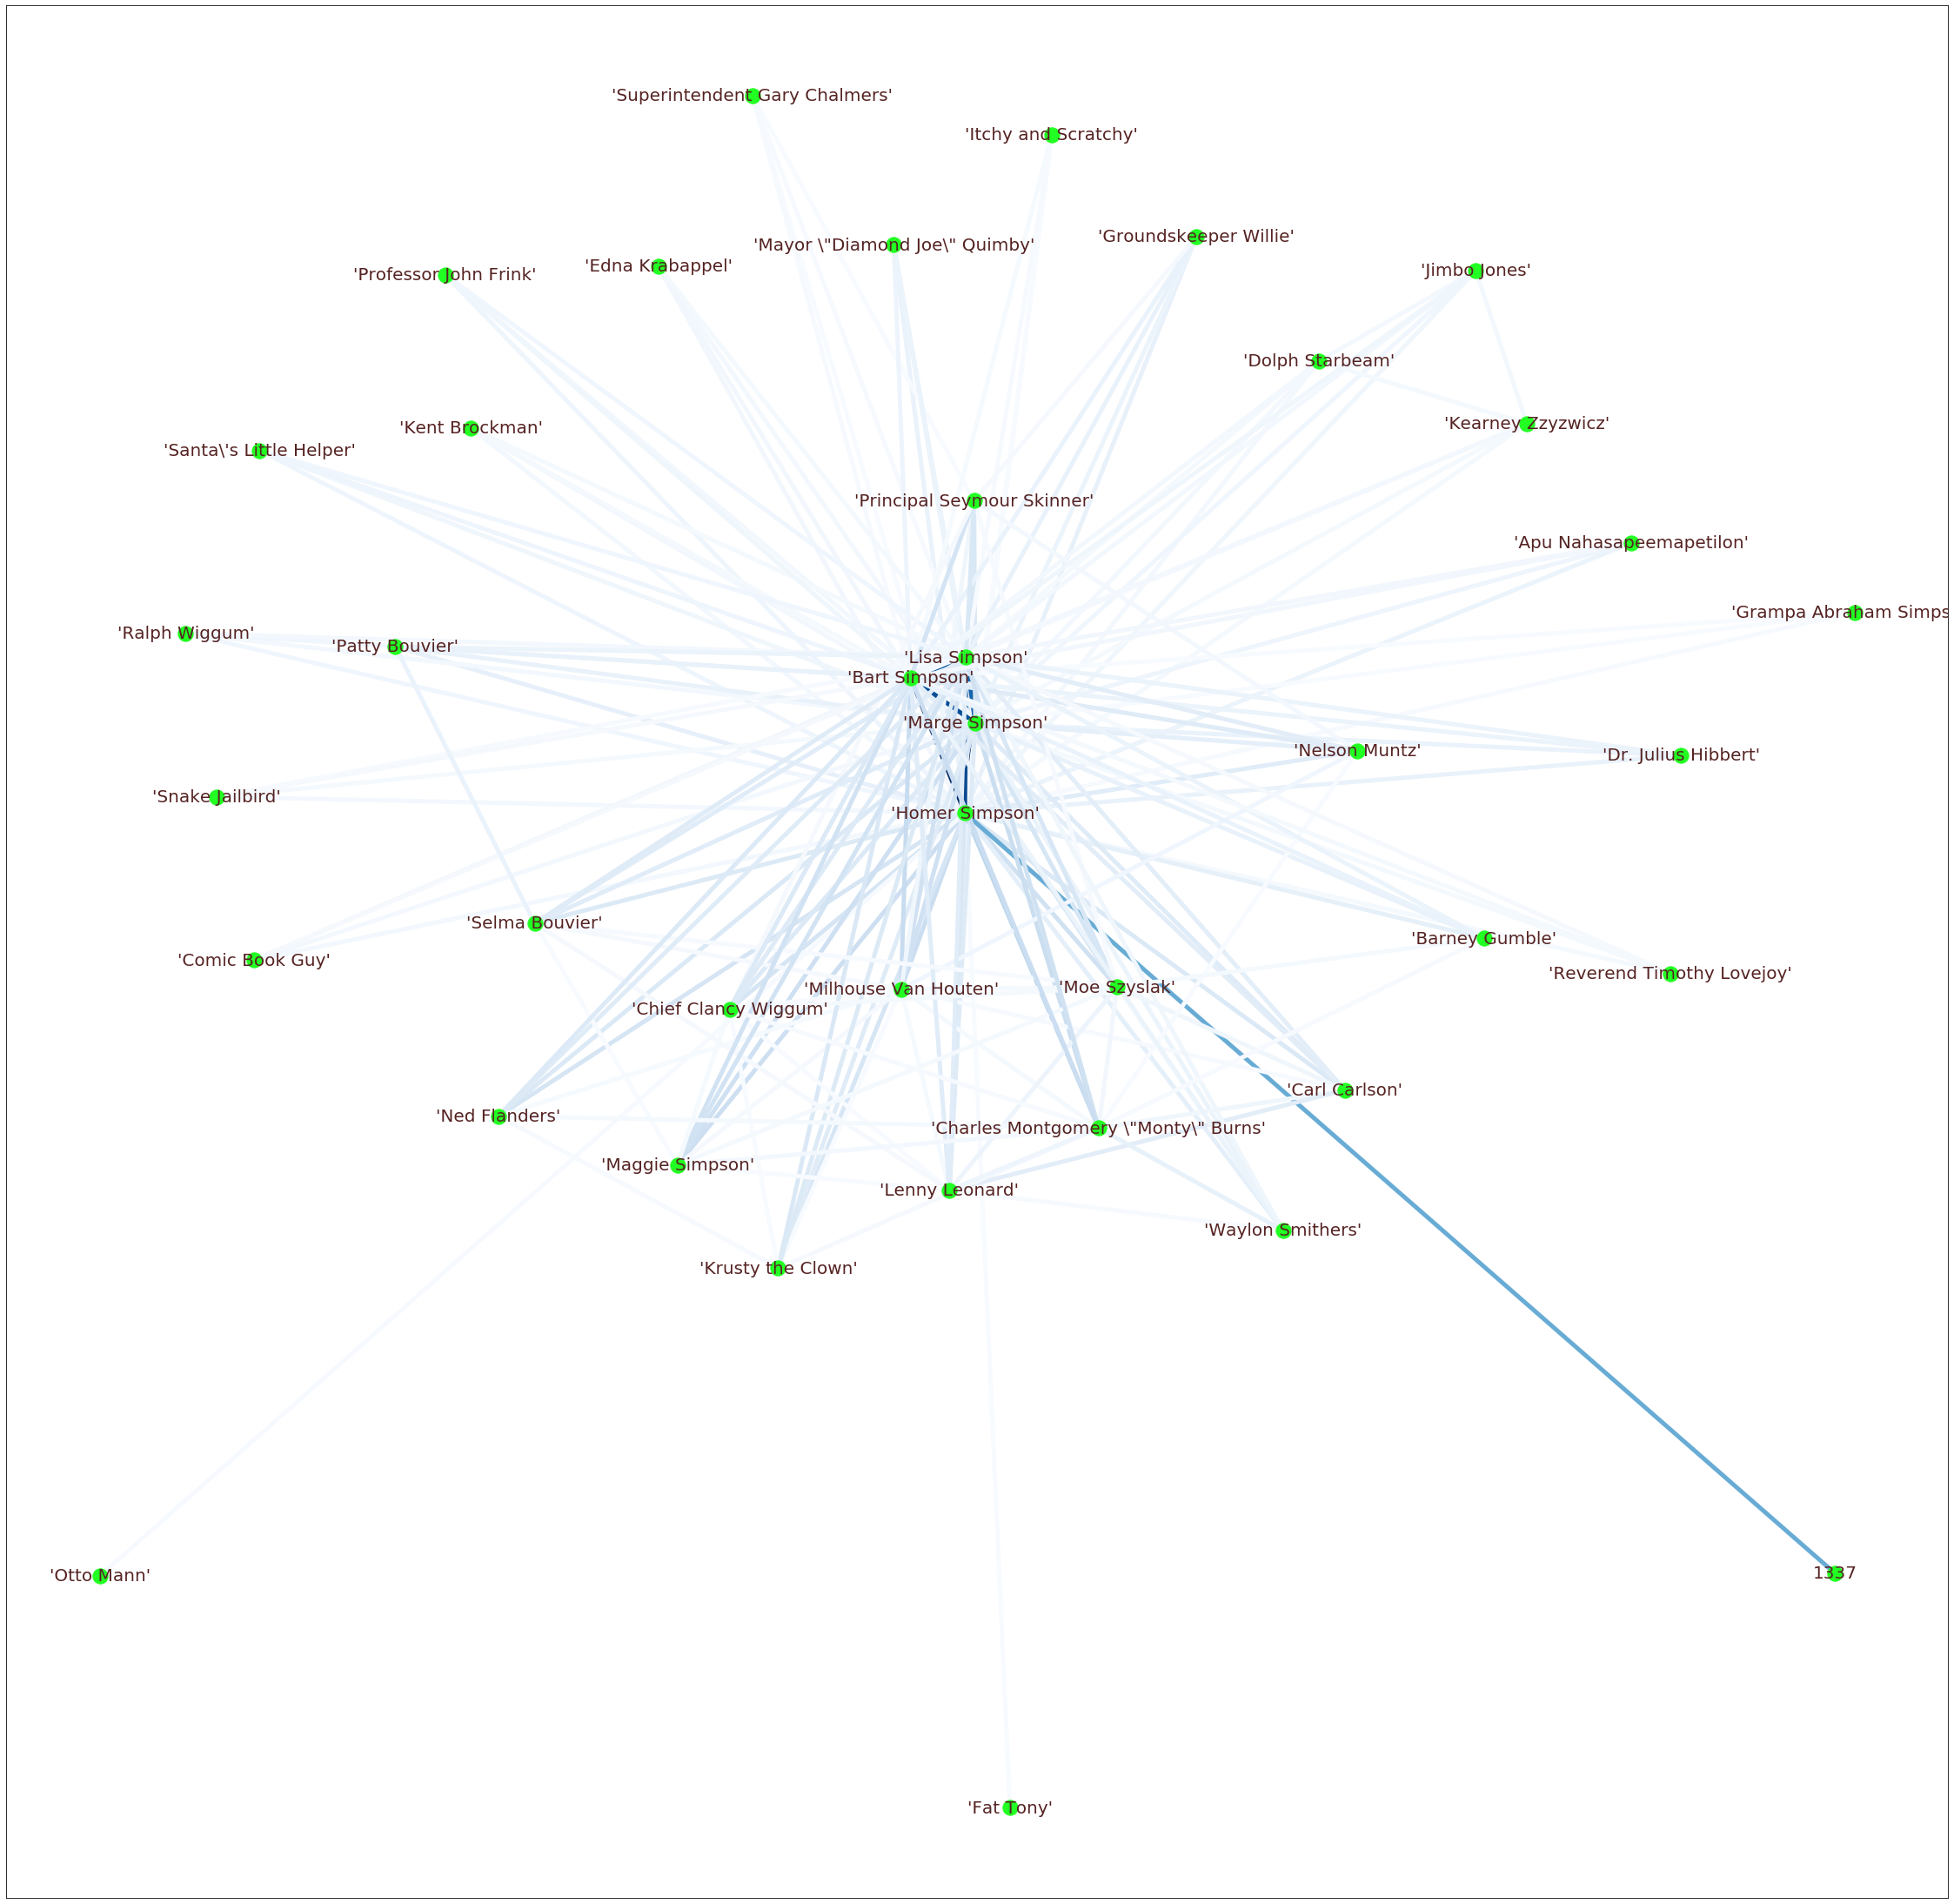

In [11]:
# Relabel the graph
df_nodes_labels_dict = df_nodes.set_index('Id').to_dict()['charname']
graph = nx.relabel_nodes(graph, df_nodes_labels_dict)

# Det the edge color according to the weight
edges,weights = zip(*nx.get_edge_attributes(graph,'Weight').items())

# Dtyle the graph
options = {
    "font_size" : 20,
    "font_color" : '#552222',
    "node_color" : '#22FF22',
    "width" : 5.0,
    "edgelist" : edges,
    "edge_color" : weights,
    "edge_cmap" : plt.cm.Blues
}

plt.figure(1,figsize=(40,40)) 

layout = nx.spring_layout(graph)  #<----- Choose the Spring layout

# TODO: plot the graph
nx.draw_networkx(graph,
                 pos=layout,
                 font_size=options['font_size'], 
                 font_color=options['font_color'],
                 node_color=options['node_color'],
                 width=options['width'],
                 edgelist=options['edgelist'],
                 edge_color=options['edge_color'],
                 edge_cmap=options['edge_cmap'])

**TODO: Write your observations here:**

- The **spring_layout** is choosen because it clearly shows the Centrality of nodes by using the *Fruchterman-Reingold force-directed algorithm*


- Observations (for the Spring layout):
    - The higher the degree a node has, the more central that node is on the graph. For example, Homer Simpson, Marge Simpson, Lisa Simpson and Bart Simpson are the ones with highest degrees, so they stand at the center of the graph. While Otto Mann, Fat Tony and me (1337) stand furthest away from the center as each only has degree of 1
    - The more weight of an edge, the bolder that edge is. So it's easy to observe characters that frequently appear together in an episode. 


- Note that one can also choose the **kamada_kawai_layout** to generate a similar graph but more stable, meaning every time the code is run, the generated graph will look the same, unlike by the *spring_layout*. This is because the initial layout generated by the *spring_layout* option is random and then it uses the Fruchterman-Reingold force-directed algorithm to produce a graph with minimal energy. Since the local minimum found is strongly influenced by the initial layout and in many cases, the itis considerably worse than a global minimum, which results in a low-quality graph. For this reason, the initial layout can be quickly created by using the **kamada_kawai_layout** and then applying the Fruchterman–Reingold algorithm on top to improve the placement of neighbouring nodes. [[reference](https://en.wikipedia.org/wiki/Force-directed_graph_drawing)]

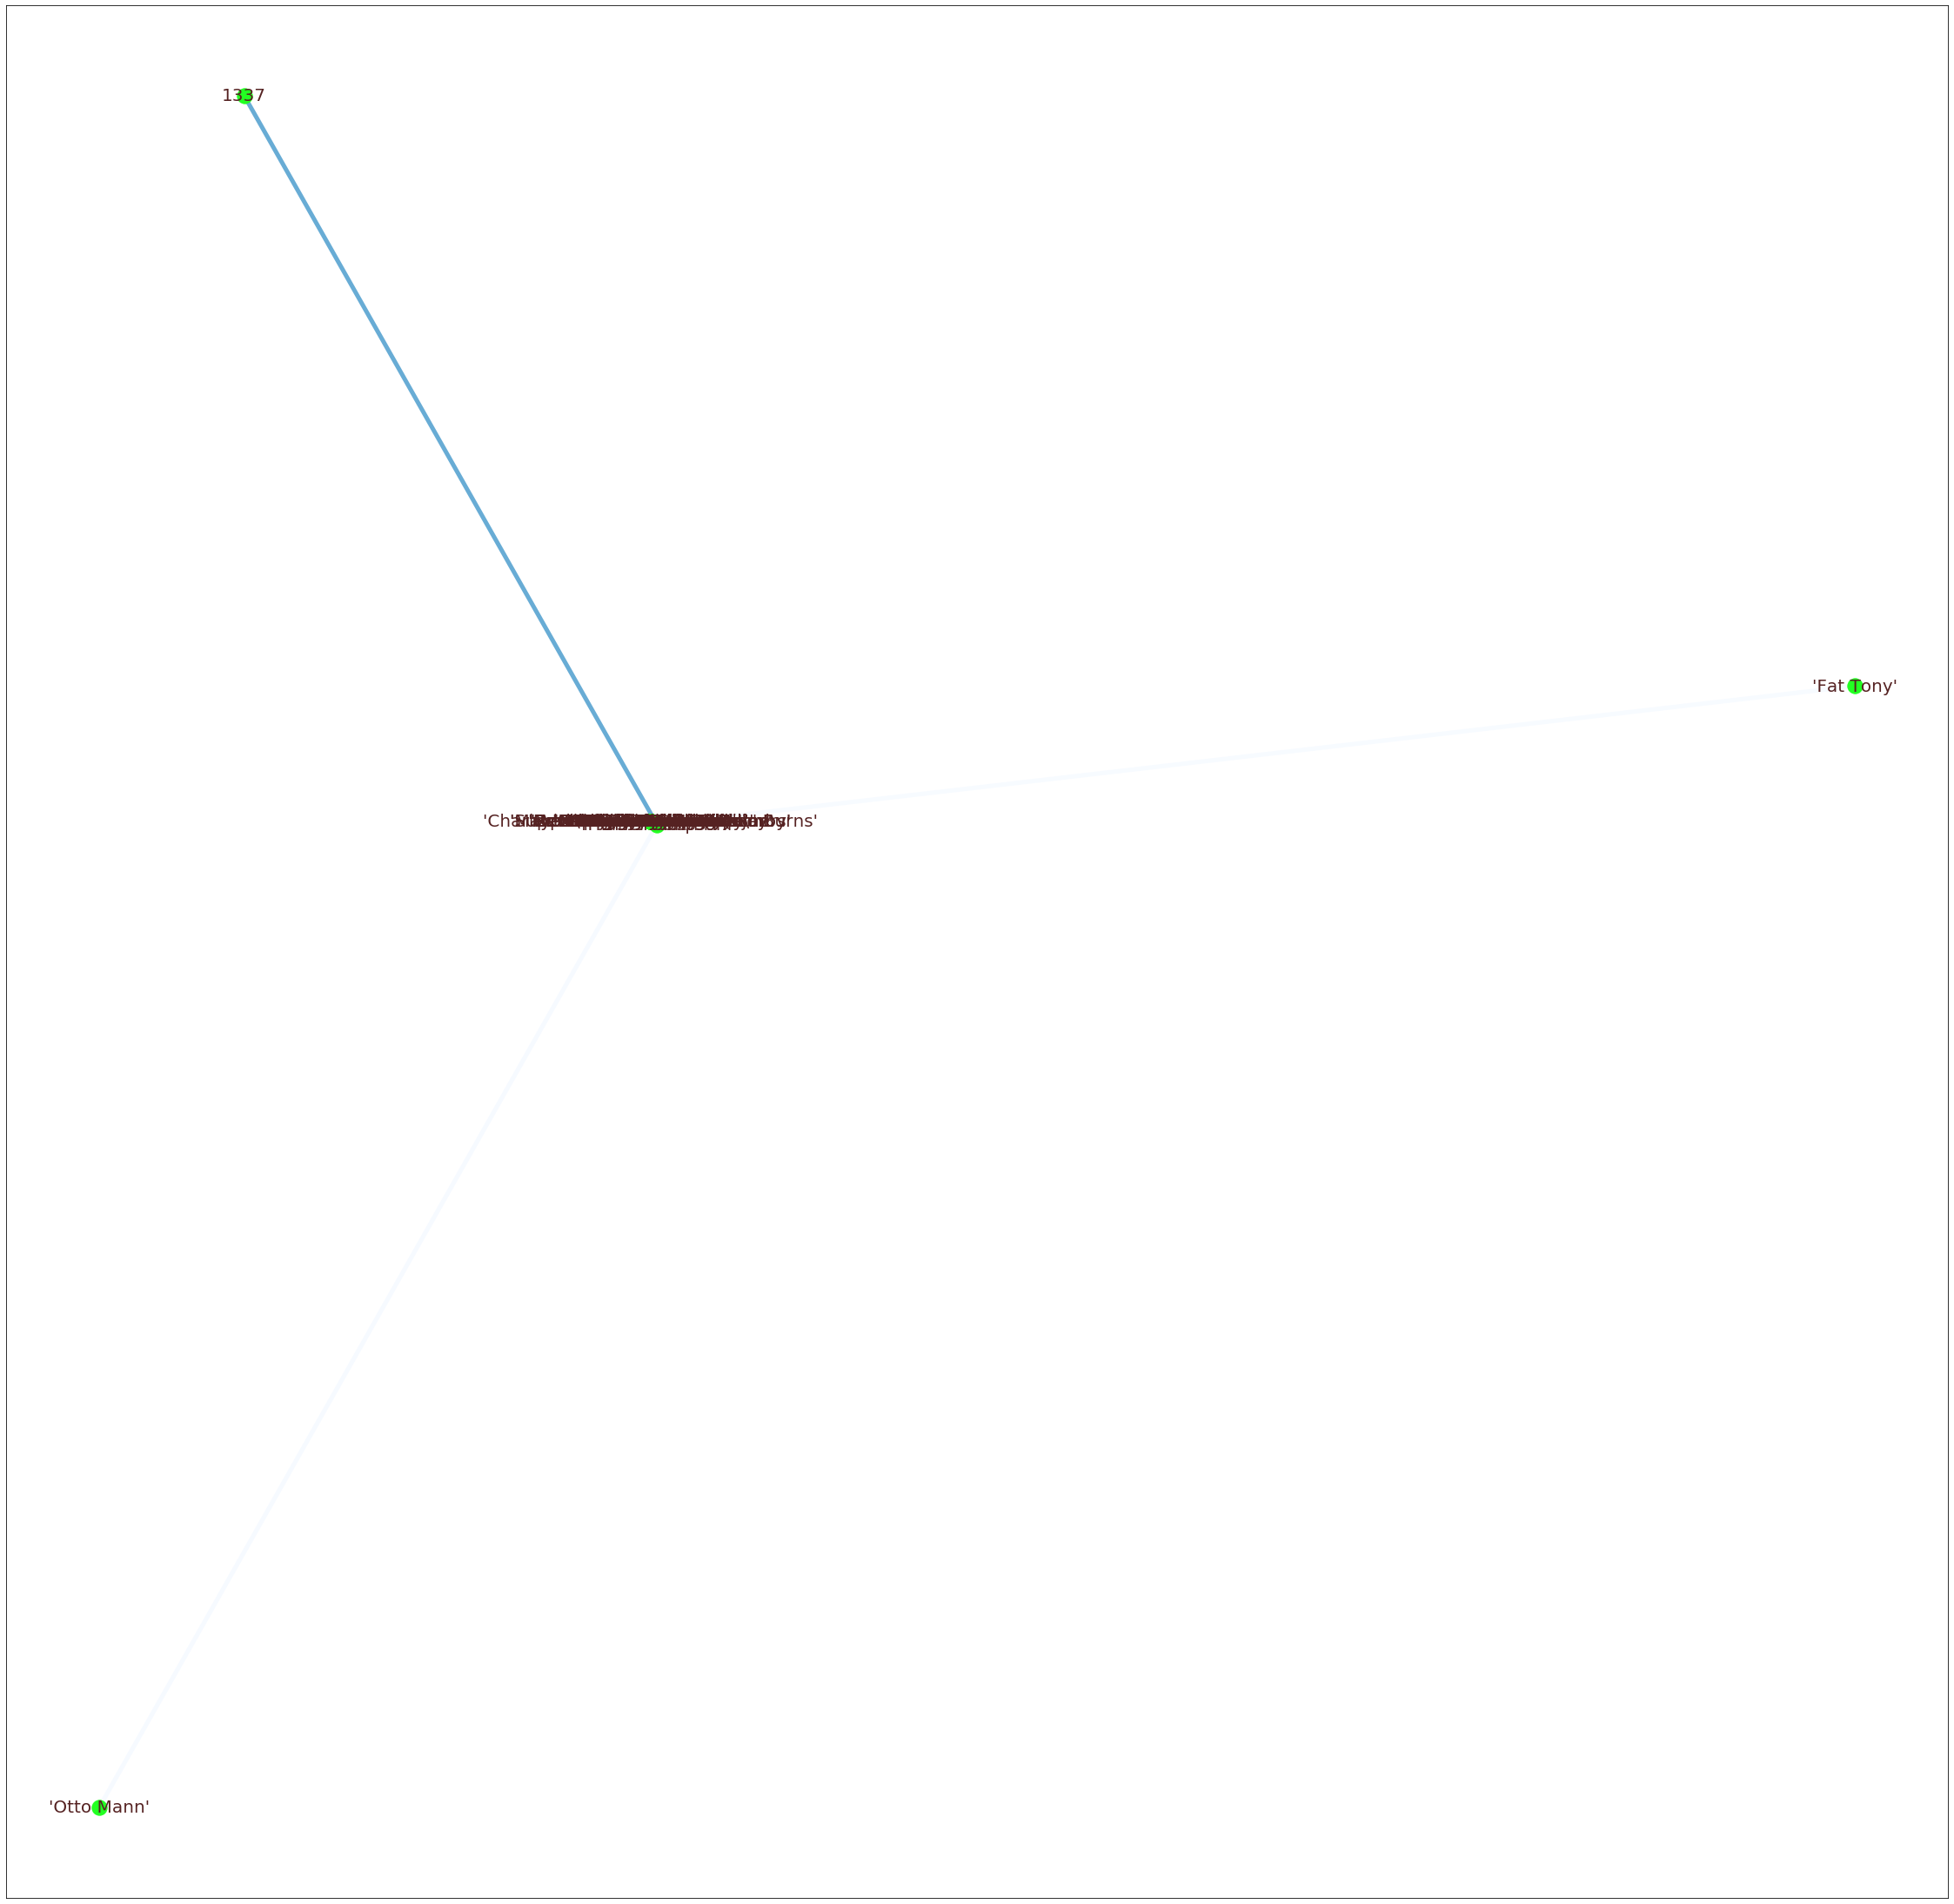

In [12]:
plt.figure(1,figsize=(40,40)) 

layout = nx.spectral_layout(graph, dim=2, weight='weight') #<----- Choose the spectral layout

# TODO: plot the graph
nx.draw_networkx(graph,
                 pos=layout,
                 font_size=options['font_size'],
                 font_color=options['font_color'],
                 node_color=options['node_color'],
                 width=options['width'],
                 edgelist=options['edgelist'],
                 edge_color=options['edge_color'],
                 edge_cmap=options['edge_cmap'])

- The **spectral_layout** is choosen because it shows the Clustering of the nodes. I could have chosen the *kamada_kawai_layout* as the second layout option instead of the *spectral_layout* but I think the *kamada_kawai_layout* does not give us much additional information about the connections between the characters that the *spring_layout* already gave us. Therefore, I choose the *spectral_layout* as the second layout because it gives us another perspective of the graph rather than the cetrality of nodes (which can be shown by the *spring_layout* or the *kamada_kawai_layout*) to see which part of the graph can possibly be related to one another. In some sense, the *spectral_layout* provides an overview of the connections among the nodes, so we can quickly see which characters may have some association to each other and which characters are considered as the 'strangers' to the others.


- Observations (for the spectral layout):
    - From the above graph, we see a big cluster of nodes in the middle of the graph indicating that most of the characters possibly know each other well enough to form such a big cluster and are related to each other to some degree except the three characters that are in the singletons.
    - The three singletons (clusters with only a single node) forms another 3 different clusters, which indicates that each of these three nodes is only associated with one of the nodes in the middle cluster and likely has no relation to the remaining nodes of the graph. This statement clearly holds for the case of node '1337' (myself with name 'Tuan Anh Ma') connecting to node 'Homer Simpson'. The spectral layout has correctly pointed out that node '1337' only has a relation to 'Homer Simpson' and is completely unrelated to other nodes that are somehow related to 'Homer Simpson' although the connection weight between '1337' and 'Homer Simpson' is pretty high (of 234)